# Session 3: Word embedding
* Gensim provides the Word2Vec class for working with a Word2Vec model.
* Learning a word embedding from text involves loading and organizing the text into sentences and providing them to the constructor of a new Word2Vec() instance.

In [ ]:
#pip install --upgrade gensim

In [ ]:
import gensim
print(gensim.__version__)

Slow version of gensim.models.doc2vec is being used
Slow version of Fasttext is being used


3.2.0


In [ ]:
import gensim.downloader
# Show all available models in gensim-data
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [ ]:
# Download the "glove-twitter-25" embeddings
google_model = gensim.downloader.load('word2vec-google-news-300')
# Use the downloaded vectors as usual:
google_model.most_similar('twitter')

[('Twitter', 0.89089035987854),
 ('Twitter.com', 0.7536781430244446),
 ('tweet', 0.7431626319885254),
 ('tweeting', 0.7161931991577148),
 ('tweeted', 0.7137226462364197),
 ('facebook', 0.6988551616668701),
 ('tweets', 0.6974530220031738),
 ('Tweeted', 0.6950210928916931),
 ('Tweet', 0.6875007152557373),
 ('Tweeting', 0.6845167279243469)]

In [ ]:
google_model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)

[('queen', 0.7118192911148071)]

In [ ]:
google_model.most_similar(positive=['woman', 'king'], negative=['queen'], topn=1)

[('man', 0.7211092114448547)]

In [ ]:
google_model.most_similar(positive=['Paris','Germany'], negative=['Berlin'], topn = 1)

[('France', 0.7884093523025513)]

In [ ]:
google_model.doesnt_match("breakfast cereal dinner lunch".split())

/Users/afillatre/opt/anaconda3/lib/python3.9/site-packages/gensim/models/keyedvectors.py:735: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'cereal'

In [ ]:
google_model.similarity('woman', 'man')

0.7664012230995352

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import string
import nltk
from nltk.corpus import stopwords
from nltk.text import TextCollection
from nltk.collocations import BigramCollocationFinder
from nltk.metrics.association import BigramAssocMeasures
from pprint import pprint
import re
from collections import Counter
label_size = 16
plt.rcParams['xtick.labelsize'] = label_size
plt.rcParams['ytick.labelsize'] = label_size

In [ ]:
sampleText = "Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence. It is concerned with the interactions between computers and human language. In particular how to program computers to process and analyze large amounts of natural language data. The goal is a computer capable of understanding the contents of documents, including the contextual nuances of the language within them. The technology can then accurately extract information and insights contained in the documents as well as categorize and organize the documents themselves."

In [ ]:
sentences = nltk.sent_tokenize(sampleText, 'english')
print(sentences)

['Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence.', 'It is concerned with the interactions between computers and human language.', 'In particular how to program computers to process and analyze large amounts of natural language data.', 'The goal is a computer capable of understanding the contents of documents, including the contextual nuances of the language within them.', 'The technology can then accurately extract information and insights contained in the documents as well as categorize and organize the documents themselves.']


### Prepare data for word2vec
gensim’s word2vec expects a sequence of sentences as its input. Each sentence a list of words (utf8 strings.

https://radimrehurek.com/gensim/models/word2vec.html#gensim.models.word2vec.Word2Vec

In [ ]:
from nltk.tokenize import RegexpTokenizer
sentences_tokenized = []
tokenizer = RegexpTokenizer(r'\w+')
for sentence in sentences:
    word_tokens = tokenizer.tokenize(sentence)
    sentences_tokenized.append(word_tokens)
print(sentences_tokenized)

[['Natural', 'language', 'processing', 'NLP', 'is', 'a', 'subfield', 'of', 'linguistics', 'computer', 'science', 'and', 'artificial', 'intelligence'], ['It', 'is', 'concerned', 'with', 'the', 'interactions', 'between', 'computers', 'and', 'human', 'language'], ['In', 'particular', 'how', 'to', 'program', 'computers', 'to', 'process', 'and', 'analyze', 'large', 'amounts', 'of', 'natural', 'language', 'data'], ['The', 'goal', 'is', 'a', 'computer', 'capable', 'of', 'understanding', 'the', 'contents', 'of', 'documents', 'including', 'the', 'contextual', 'nuances', 'of', 'the', 'language', 'within', 'them'], ['The', 'technology', 'can', 'then', 'accurately', 'extract', 'information', 'and', 'insights', 'contained', 'in', 'the', 'documents', 'as', 'well', 'as', 'categorize', 'and', 'organize', 'the', 'documents', 'themselves']]


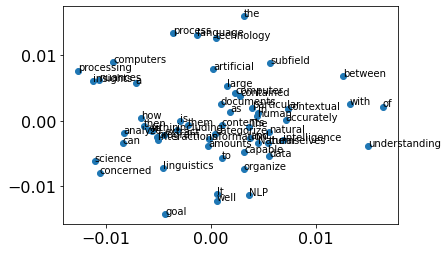

In [ ]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
# define training data

# train model
model = Word2Vec(sentences_tokenized, min_count=1) # min_count: pruning the internal dictionary.
#model.save('model')
#new_model = gensim.models.Word2Vec.load('mymodel')

# fit a 2d PCA model to the vectors
X = model[model.wv.vocab] # The trained word vectors are stored in a KeyedVectors instance, as model.wv
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)

for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

Along with the paper and code for word2vec, Google also published a pre-trained word2vec model on the Word2Vec Google Code Project.

A pre-trained model is nothing more than a file containing tokens and their associated word vectors. The pre-trained Google word2vec model was trained on Google news data (about 100 billion words); it contains 3 million words and phrases and was fit using 300-dimensional word vectors.

In [ ]:
vector = model['subfield']  # get numpy vector of a word
sims = model.most_similar('subfield', topn=10)  # get other similar words
print(sims)

[('the', 0.250369131565094), ('technology', 0.21184013783931732), ('of', 0.18897578120231628), ('between', 0.17093327641487122), ('The', 0.14598652720451355), ('human', 0.14592790603637695), ('language', 0.1402280628681183), ('categorize', 0.13187864422798157), ('process', 0.12257368117570877), ('amounts', 0.10224154591560364)]
